In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In case you would like to know where the data comes from, you can also find numerous other sets within this same place: 
* https://www.kaggle.com/datasets/divyansh22/toronto-covid19-cases

In [2]:
#Reading in dataset for exploration
covid_df=pd.read_csv('Data/covid_toronto/COVID19_cases_Toronto.csv')

Let's first get an idea of how big the set we are working with is

In [3]:
#get set shape
covid_df.shape

(14911, 17)

Now let's see the columns we are dealing with as well

In [4]:
#Column list
covid_df.columns

Index(['_id', 'Outbreak Associated', 'Age Group', 'Neighbourhood Name', 'FSA',
       'Source of Infection', 'Classification', 'Episode Date',
       'Reported Date', 'Client Gender', 'Outcome', 'Currently Hospitalized',
       'Currently in ICU', 'Currently Intubated', 'Ever Hospitalized',
       'Ever in ICU', 'Ever Intubated'],
      dtype='object')

In [5]:
#Lets take a look at what the column look like
covid_df.head()

,_id,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,44294,Sporadic,50-59,Malvern,M1B,Institutional,CONFIRMED,2020-03-25,2020-03-27,MALE,RESOLVED,No,No,No,No,No,No
1,44295,Sporadic,20-29,Malvern,M1B,Community,CONFIRMED,2020-03-20,2020-03-28,MALE,RESOLVED,No,No,No,Yes,No,No
2,44296,Sporadic,60-69,Malvern,M1B,Travel,CONFIRMED,2020-03-04,2020-03-08,FEMALE,RESOLVED,No,No,No,Yes,Yes,Yes
3,44297,Outbreak Associated,50-59,Rouge,M1B,N/A - Outbreak associated,CONFIRMED,2020-05-02,2020-05-04,FEMALE,RESOLVED,No,No,No,No,No,No
4,44298,Sporadic,30-39,Rouge,M1B,Close contact,CONFIRMED,2020-05-31,2020-06-06,FEMALE,RESOLVED,No,No,No,No,No,No


We may have null values. Most ML algorithms are unable to handle these. So let's get into some NA handling.

This identifies which values are null within each column, and sums the number of null values within each column to get the number of null values for each field.

In [6]:
#isna identifies nulls, sum identifies the total
covid_df.isna().sum()

_id                         0
Outbreak Associated         0
Age Group                  32
Neighbourhood Name        613
FSA                       567
Source of Infection         0
Classification              0
Episode Date                0
Reported Date               0
Client Gender               0
Outcome                     0
Currently Hospitalized      0
Currently in ICU            0
Currently Intubated         0
Ever Hospitalized           0
Ever in ICU                 0
Ever Intubated              0
dtype: int64

Typically we'd want to get creative with our null handling. You can imploy techniques such as:
* Presume values based on the highest frequency of values
* Potentially use values from a different column
* Combine columns
* Drop columns with numerous nulls

In [7]:
#Delete all rows with the na values
covid_df.dropna()

,_id,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,44294,Sporadic,50-59,Malvern,M1B,Institutional,CONFIRMED,2020-03-25,2020-03-27,MALE,RESOLVED,No,No,No,No,No,No
1,44295,Sporadic,20-29,Malvern,M1B,Community,CONFIRMED,2020-03-20,2020-03-28,MALE,RESOLVED,No,No,No,Yes,No,No
2,44296,Sporadic,60-69,Malvern,M1B,Travel,CONFIRMED,2020-03-04,2020-03-08,FEMALE,RESOLVED,No,No,No,Yes,Yes,Yes
3,44297,Outbreak Associated,50-59,Rouge,M1B,N/A - Outbreak associated,CONFIRMED,2020-05-02,2020-05-04,FEMALE,RESOLVED,No,No,No,No,No,No
4,44298,Sporadic,30-39,Rouge,M1B,Close contact,CONFIRMED,2020-05-31,2020-06-06,FEMALE,RESOLVED,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14293,58587,Sporadic,50-59,West Humber-Clairville,M9W,Close contact,CONFIRMED,2020-05-18,2020-05-23,FEMALE,RESOLVED,No,No,No,No,No,No
14294,58588,Sporadic,30-39,West Humber-Clairville,M9W,Close contact,CONFIRMED,2020-04-12,2020-04-16,MALE,RESOLVED,No,No,No,No,No,No
14295,58589,Sporadic,20-29,West Humber-Clairville,M9W,Community,CONFIRMED,2020-05-12,2020-05-15,FEMALE,RESOLVED,No,No,No,No,No,No
14296,58590,Sporadic,20-29,West Humber-Clairville,M9W,Healthcare,CONFIRMED,2020-05-23,2020-05-29,FEMALE,RESOLVED,No,No,No,No,No,No


Since we are only losing 700 out of 15000 values, I think we can just drop these, however make sure you aren't deleting too much data. 

In [8]:
#drop values permanently inplace is a pandas option that will make a permanent change
covid_df.dropna(inplace=True)

Initial Exploration, now let's explore our data

First, it helps to seperate the columns by categorical, and numerical. This might help us find relationships more easily.

In [9]:
#List of categorical inputs
categorical_inputs=[
                   'Outbreak Associated', 
                   'Age Group', 
                   'Neighbourhood Name', 
                   'FSA',
                   'Source of Infection', 
                   'Classification',
                   'Client Gender', 
                   'Currently Hospitalized',
                   'Currently in ICU', 
                   'Currently Intubated', 
                   'Ever Hospitalized',
                   'Ever in ICU', 
                   'Ever Intubated'
                    ]

In [10]:
#List of numerical inputs
numerical_inputs=[
                 'Episode Date',
                 'Reported Date'
                 ]

In [11]:
#Let's change the dates from string to datetime
for i in numerical_inputs:
    covid_df[i]=pd.to_datetime(covid_df[i])

In [12]:
#You don't have to do this, it helps expedite the process of calling the output variable numerous times
output='Outcome'

Let's look at the distribution of output categories. We see that we have a highly imbalanced dataset. We also have a problem with the active value which incates that we don't know if the case was fatal or resolved.

<AxesSubplot:xlabel='Outcome'>

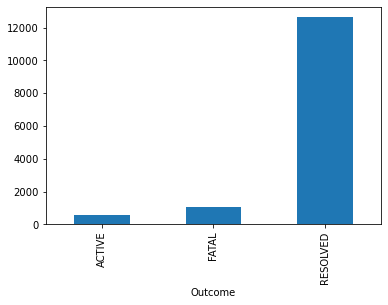

In [13]:
#To make a bar chart, we group by category, select a category that's not the same as the column we'd like to group by, then plot
covid_df.groupby([output]).count()['_id'].plot(kind='bar')

Now, let's take a look at the distirbutions for each of our other categorical fields

-----
Outbreak Associated
Number of Categories
2


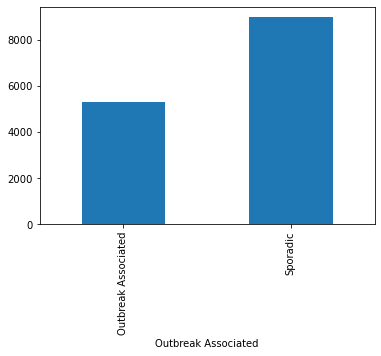

-----
Age Group
Number of Categories
9


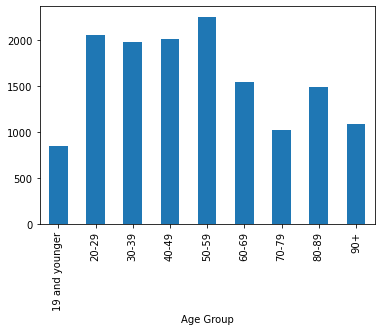

-----
Neighbourhood Name
Number of Categories
140


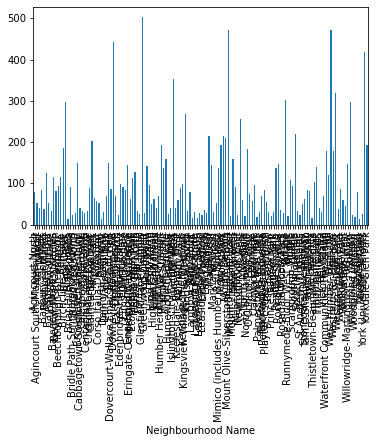

-----
FSA
Number of Categories
96


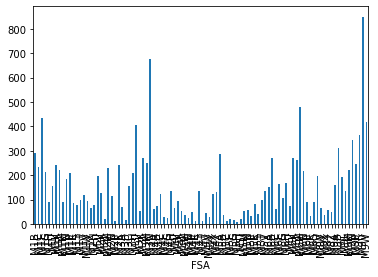

-----
Source of Infection
Number of Categories
8


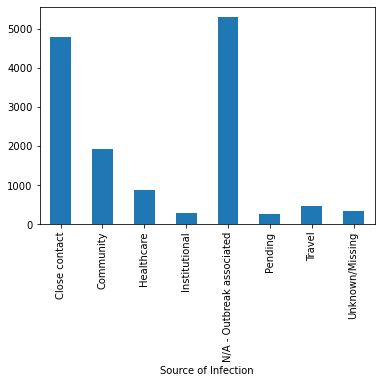

-----
Classification
Number of Categories
2


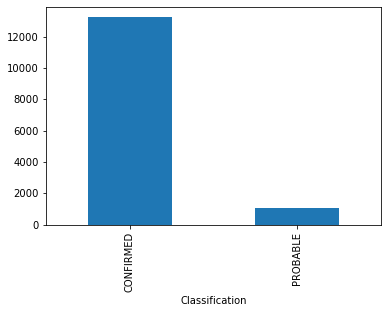

-----
Client Gender
Number of Categories
5


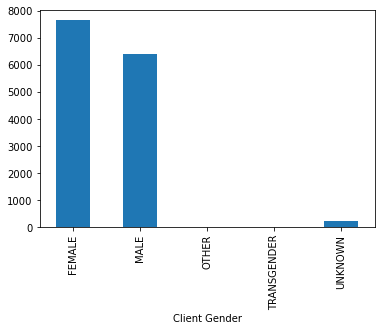

-----
Currently Hospitalized
Number of Categories
2


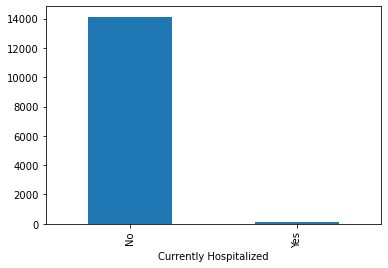

-----
Currently in ICU
Number of Categories
2


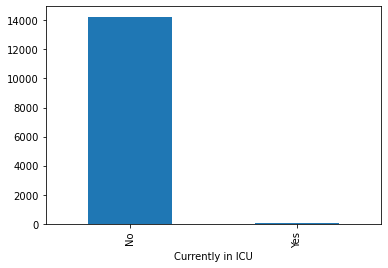

-----
Currently Intubated
Number of Categories
2


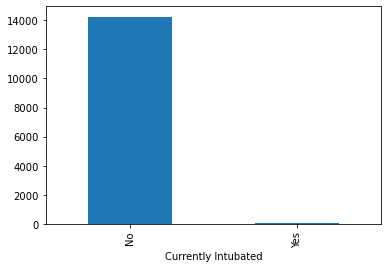

-----
Ever Hospitalized
Number of Categories
2


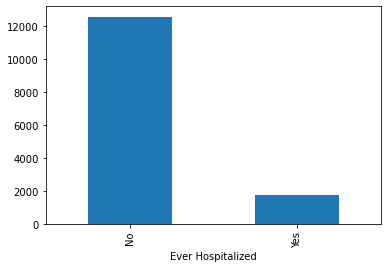

-----
Ever in ICU
Number of Categories
2


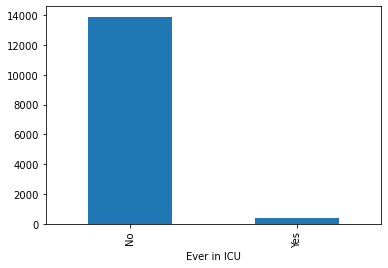

-----
Ever Intubated
Number of Categories
2


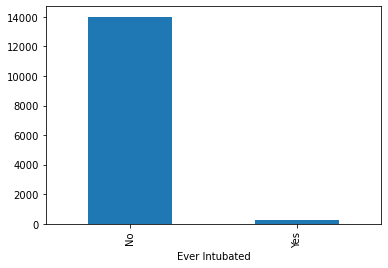

In [14]:
#iterate through categorical inputs
for i in categorical_inputs:
    #seperate plots
    print('-----')
    #print name
    print(i)
    print('Number of Categories')
    #print number of categories
    print(len(set(covid_df[i])))
    #plot the distirbutions
    covid_df.groupby(i).count()['_id'].plot(kind='bar')
    #show plot
    plt.show()

We see alot of fields that have heavily disproportionate fields we may have to deal with
Some fields have too many categories to be useful, and may have to be further preprocessed to explore
Some fields have categories that can be deleted due to their addition of noise

Now let's see how our categorical fields relate to the output variable

-----
Outbreak Associated
Number of Categories
2


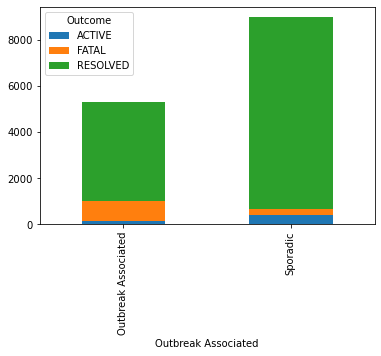

-----
Age Group
Number of Categories
9


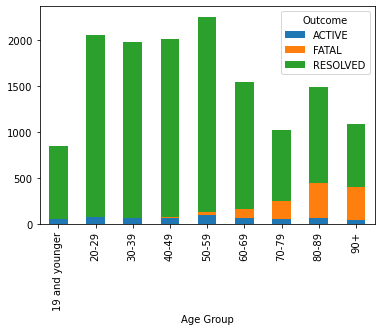

-----
Neighbourhood Name
Number of Categories
140


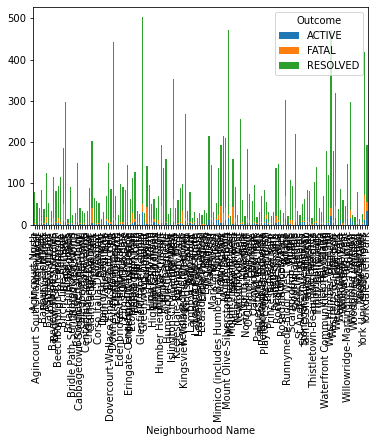

-----
FSA
Number of Categories
96


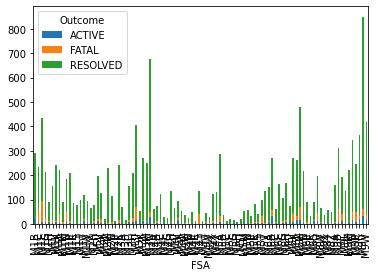

-----
Source of Infection
Number of Categories
8


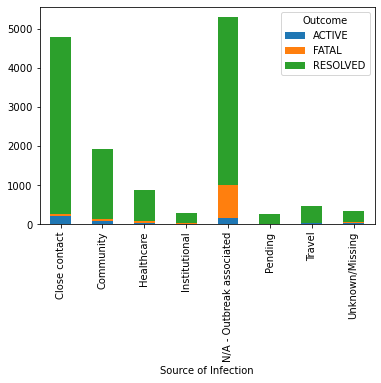

-----
Classification
Number of Categories
2


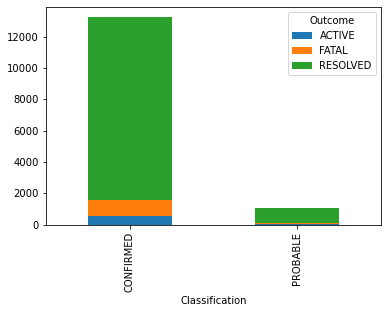

-----
Client Gender
Number of Categories
5


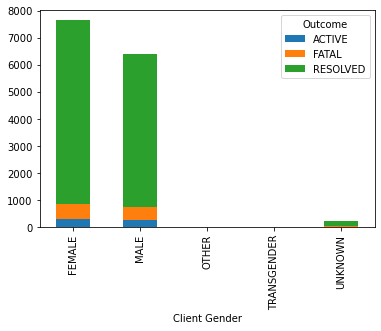

-----
Currently Hospitalized
Number of Categories
2


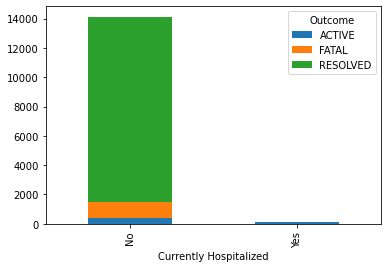

-----
Currently in ICU
Number of Categories
2


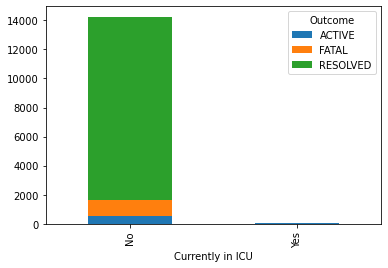

-----
Currently Intubated
Number of Categories
2


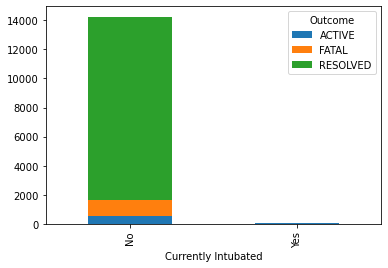

-----
Ever Hospitalized
Number of Categories
2


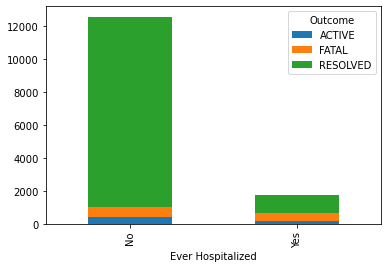

-----
Ever in ICU
Number of Categories
2


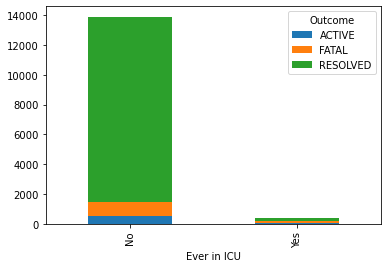

-----
Ever Intubated
Number of Categories
2


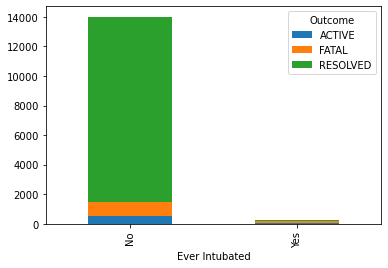

In [15]:
#iterate through the categorical input columns, and find the relationships
for i in categorical_inputs:
    print('-----')
    #print name of column
    print(i)
    print('Number of Categories')
    #print number of categories
    print(len(set(covid_df[i])))
    #Now create the stacked bar chart
    #group the values by the desired columns, pick a column to (it doesn't matter which one) unstack to make one rows and one columns, then plot
    covid_df.groupby([i,output]).count()['_id'].unstack().plot(kind='bar',stacked=True)
    plt.show()

This provides alot of valuable analysis
* patients associated with the ourbreak have far more fatalities associated with it, pattern follows for associated infection
* The older the age group, the more fatalities are associated with an individual
* confirmed classification has far more fatalities associated with them
* All currents equaling yes seem to be exclusively acitve, these fields may not be useful
* Ever hospitalized has a similar number of fatalities associated with both categories, however the proportion of fatalities seems far higher
* Ever Intubated and in ICU have far different frequencies of fatalities, but this is likely due to the far lower number of people in the yes categories

Now let's look at the date variables associated

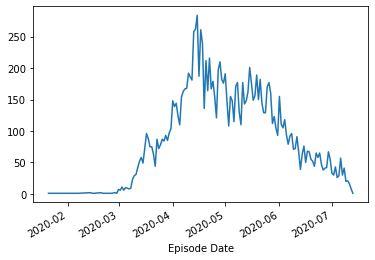

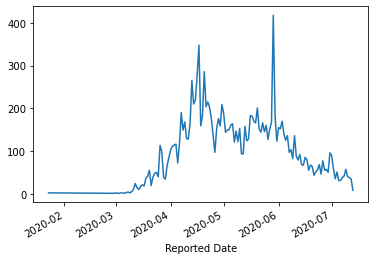

In [16]:
#Iterate through numerical inputs
for i in numerical_inputs:
    #group cases by date
    covid_df.groupby(i).count()['_id'].plot(kind='line')
    #show plot
    plt.show()

Would like to see fatal and resolved per each date

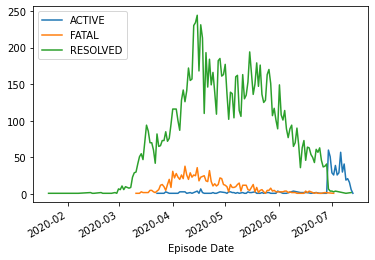

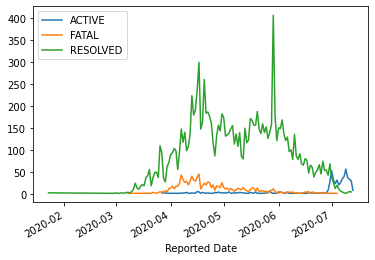

In [17]:
#Iterate through numerical inputs
for i in numerical_inputs:
    for j in set(covid_df['Outcome']):
        filtered_df = covid_df[covid_df['Outcome']==j]
        #group cases by date
        filtered_df.groupby(i).count()['_id'].plot(kind='line',label=j)
    #plot the legend in the corner
    plt.legend(loc="upper left")
    #show plot
    plt.show()

We see most episodes occured around April, in reported cases, we have one spike between April and May, while there was a huge spike in reported cases in June. This may indicate an effort to collect Covid information within June. Fatal cases for both reported and epsisode dates both peak between April and May.

Now let's do some feature engineering, we can start by editing the gender field to consolodate the UNKNOWN gender category. 

In [18]:
#Let's fill the gender column to reduce values to male female and others
def fill_values(field,valid,filler,df):
    #empty list
    gender=[]
    #iterate through the field
    for i in df[field]:
        #check if the value is in the proper list
        if i not in valid:
            #if true append the filler value
            gender.append(filler)
        else:
            #if false append the value
            gender.append(i)
    #add field to the dataset
    df[field]=gender
    return df

In [19]:
#Function execution
covid_df=fill_values('Client Gender',['MALE','FEMALE'],'OTHER',covid_df)

Now let's explore the fields with too many categories, namely neighborhood and FSA (geographical grouping by the Candaian postal code). Categorical fields with too many cateogries will create numerous extraneous columns that may result in overtraining, and absurd computational training times. In this case, we are primarily thinning th ecolumns for analysis.

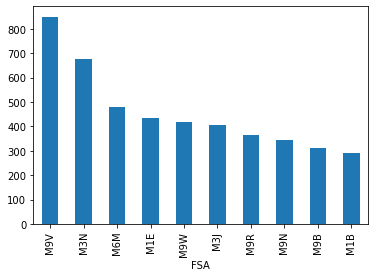

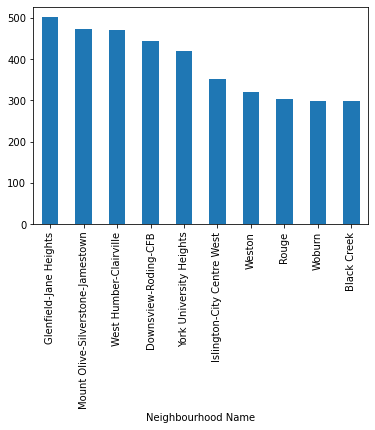

In [20]:
#Let's see which neighborhods and FSAs have the most values
too_many=['FSA','Neighbourhood Name']
#iterate through columns
for i in too_many:
    #Let's plot only the top 10 neighborhoods
    covid_df.groupby(i).count().sort_values('_id',ascending=False)['_id'][0:10].plot(kind='bar')
    plt.show()

Now let's see the breakdowns of outcomes for each field. This is tricky since we can't just select the top values, because it will take the top columns with the highest frequency categories. So we sort by the highest total categories, then plot the breakdown.

In [21]:
#let's get the sums of each row
def get_sums(df):
    #start sum list
    sums=[]
    #let's append the sums to the list
    for k,l in enumerate(df.index):
        sums.append(sum(df.iloc[k,:]))
    return sums

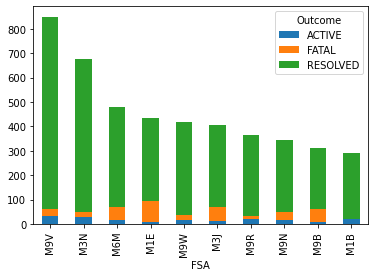

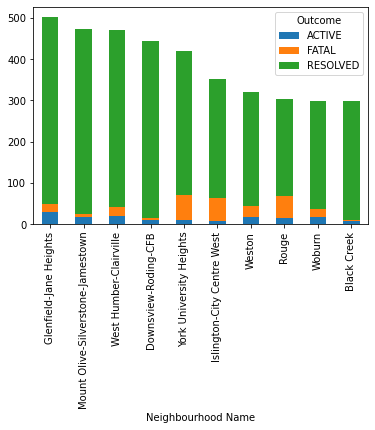

In [22]:
#iterate through 
for i in too_many:
    #Create the unstacked dataframe
    grouped=covid_df.groupby([i,output]).count().unstack()['_id']
    #get sums of each row
    sums=get_sums(grouped)
    #create the sum columns
    grouped['sums']=sums
    #Sort by the sums to select the top rows
    top_10=grouped.sort_values('sums',ascending=False).iloc[range(0,10)]
    #Drop the sum column and plot
    top_10.drop('sums',axis=1).plot(kind='bar',stacked=True)
    plt.show()

We can see some interesting patterns,M1E, M3J, and M9B are FSAs with a high number of fatalities. York University, Islington City, and Rogue are neighborhoods with high frequencies of fatalities.

Now let's see what would happen if we put a frequency filter on the FSA and neighborhood count

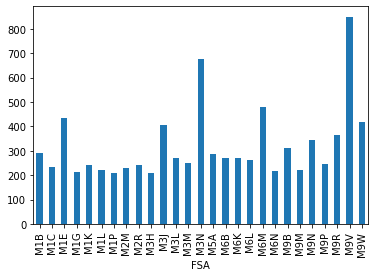

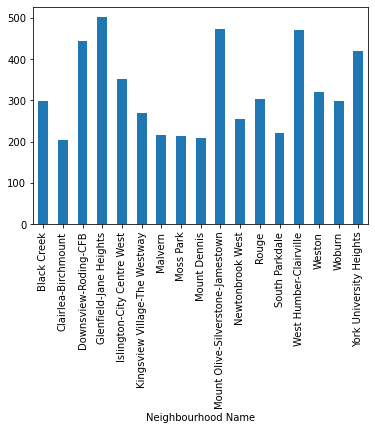

In [23]:
#frequency filter execution
for i in too_many:
    #get frequencies
    grouped_df=covid_df.groupby(i).count()
    #Filter bu frequncy
    filtered=grouped_df[grouped_df['_id']>=200]
    #now let's plot
    filtered['_id'].plot(kind='bar')
    plt.show()

Let's put a frequency filter on the breakdown of outcome bars for the neighborhoods and FSAs

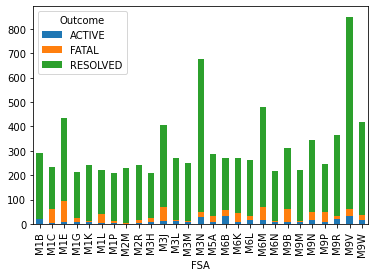

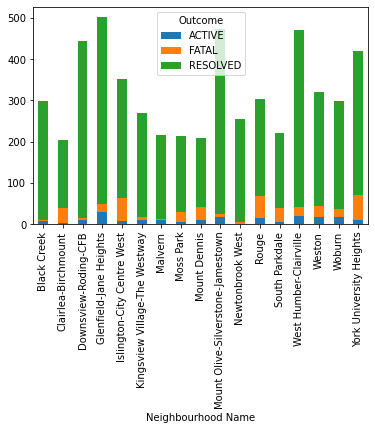

In [24]:
#Now let's do what we did with the previous breakdown columns
for i in too_many:
    grouped_df=covid_df.groupby([i,output]).count().unstack()['_id']
    #get total sums for each FSA
    sums=get_sums(grouped_df)
    #get the sum column
    grouped_df['sums']=sums
    #only take FSAs with the total cases greater than 200
    filtered=grouped_df[grouped_df['sums']>=200]
    #drop the unneeded columns
    filtered.drop('sums',axis=1).plot(kind='bar',stacked=True)
    plt.show()   

We do have some additional categories with high levels of fatalities, so this may be the better way to strike a balance

Difference between episode and reported date

In [25]:
#Now let's creatrre some numerical fields, let's see if the length it takes for an epsiode to get reported has an effect
covid_df['episode_vs_reported']=(covid_df['Reported Date']-covid_df['Episode Date'])

In [26]:
#Let's convert it to number of days
covid_df['episode_vs_reported_int']=[i.days for i in covid_df['episode_vs_reported']]

In [27]:
covid_df.head()

,_id,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated,episode_vs_reported,episode_vs_reported_int
0,44294,Sporadic,50-59,Malvern,M1B,Institutional,CONFIRMED,2020-03-25,2020-03-27,MALE,RESOLVED,No,No,No,No,No,No,2 days,2
1,44295,Sporadic,20-29,Malvern,M1B,Community,CONFIRMED,2020-03-20,2020-03-28,MALE,RESOLVED,No,No,No,Yes,No,No,8 days,8
2,44296,Sporadic,60-69,Malvern,M1B,Travel,CONFIRMED,2020-03-04,2020-03-08,FEMALE,RESOLVED,No,No,No,Yes,Yes,Yes,4 days,4
3,44297,Outbreak Associated,50-59,Rouge,M1B,N/A - Outbreak associated,CONFIRMED,2020-05-02,2020-05-04,FEMALE,RESOLVED,No,No,No,No,No,No,2 days,2
4,44298,Sporadic,30-39,Rouge,M1B,Close contact,CONFIRMED,2020-05-31,2020-06-06,FEMALE,RESOLVED,No,No,No,No,No,No,6 days,6


https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Toronto
* Looking at the timeline, major events were occuring month to month
* This may provide another great field to use

In [28]:
#Let's also change the months to numbers to make it easier for the model and do some exploration
covid_df['Episode_Month']=[i.month for i in covid_df['Episode Date']]
covid_df['Reported_Month']=[i.month for i in covid_df['Reported Date']]

In [29]:
covid_df.head()

,_id,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,...,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated,episode_vs_reported,episode_vs_reported_int,Episode_Month,Reported_Month
0,44294,Sporadic,50-59,Malvern,M1B,Institutional,CONFIRMED,2020-03-25,2020-03-27,MALE,...,No,No,No,No,No,No,2 days,2,3,3
1,44295,Sporadic,20-29,Malvern,M1B,Community,CONFIRMED,2020-03-20,2020-03-28,MALE,...,No,No,No,Yes,No,No,8 days,8,3,3
2,44296,Sporadic,60-69,Malvern,M1B,Travel,CONFIRMED,2020-03-04,2020-03-08,FEMALE,...,No,No,No,Yes,Yes,Yes,4 days,4,3,3
3,44297,Outbreak Associated,50-59,Rouge,M1B,N/A - Outbreak associated,CONFIRMED,2020-05-02,2020-05-04,FEMALE,...,No,No,No,No,No,No,2 days,2,5,5
4,44298,Sporadic,30-39,Rouge,M1B,Close contact,CONFIRMED,2020-05-31,2020-06-06,FEMALE,...,No,No,No,No,No,No,6 days,6,5,6


In [30]:
covid_df.columns

Index(['_id', 'Outbreak Associated', 'Age Group', 'Neighbourhood Name', 'FSA',
       'Source of Infection', 'Classification', 'Episode Date',
       'Reported Date', 'Client Gender', 'Outcome', 'Currently Hospitalized',
       'Currently in ICU', 'Currently Intubated', 'Ever Hospitalized',
       'Ever in ICU', 'Ever Intubated', 'episode_vs_reported',
       'episode_vs_reported_int', 'Episode_Month', 'Reported_Month'],
      dtype='object')

Let's see some numerical scatterplots between reported and episode month

<AxesSubplot:xlabel='Episode_Month', ylabel='Reported_Month'>

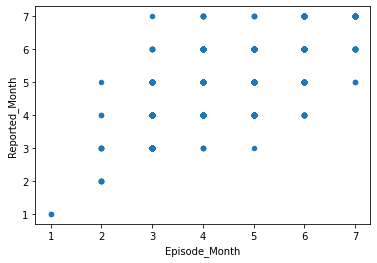

In [31]:
#scatter plot execution
covid_df.plot('Episode_Month','Reported_Month',kind='scatter')

Now let's see an exmaple of a histogram, we will do this for the epsiode vs reported date field

<AxesSubplot:ylabel='Frequency'>

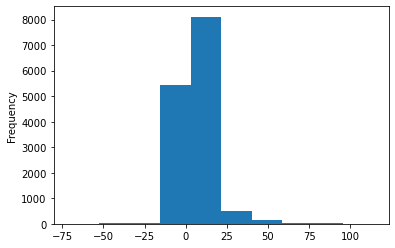

In [32]:
#epsisode vs reported differences
covid_df['episode_vs_reported_int'].plot(kind='hist')

Obviously, the episode date can't come before the reported date, so we may need to drop (or edit some values using other internal or external data) to increase data quality. 

Now let's make the final prepartions of our dataset. We will drop some unneeded or poor quality data to make our model better.

In [33]:
#take a look at the lowest values for episode vs reported date
covid_df.sort_values(['episode_vs_reported_int'])['episode_vs_reported_int']

10643    -71
11503    -65
12098    -54
4676     -51
1202     -51
        ... 
8119      87
11492     89
3236      94
3668     104
7583     114
Name: episode_vs_reported_int, Length: 14274, dtype: int64

Negative values do not make any sense in this context, how can an episode premptively be reported before a single symptom appears. Therefore, there is someting fishy about these data entries. 

In [34]:
covid_df[covid_df['episode_vs_reported_int']<0]

,_id,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,...,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated,episode_vs_reported,episode_vs_reported_int,Episode_Month,Reported_Month
138,44432,Outbreak Associated,70-79,Malvern,M1B,N/A - Outbreak associated,CONFIRMED,2020-07-06,2020-07-01,FEMALE,...,No,No,No,No,No,No,-5 days,-5,7,7
169,44463,Sporadic,50-59,Malvern,M1B,Institutional,CONFIRMED,2020-04-08,2020-04-07,FEMALE,...,No,No,No,No,No,No,-1 days,-1,4,4
187,44481,Sporadic,30-39,Malvern,M1B,Community,CONFIRMED,2020-07-01,2020-06-27,MALE,...,No,No,No,Yes,No,No,-4 days,-4,7,6
223,44517,Sporadic,50-59,Malvern,M1B,Institutional,CONFIRMED,2020-04-21,2020-04-20,FEMALE,...,No,No,No,No,No,No,-1 days,-1,4,4
261,44555,Sporadic,40-49,Malvern,M1B,Institutional,CONFIRMED,2020-05-04,2020-05-01,MALE,...,No,No,No,No,No,No,-3 days,-3,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,58438,Sporadic,40-49,Elms-Old Rexdale,M9W,Close contact,CONFIRMED,2020-04-13,2020-04-12,MALE,...,No,No,No,No,No,No,-1 days,-1,4,4
14201,58495,Sporadic,20-29,West Humber-Clairville,M9W,Community,CONFIRMED,2020-05-14,2020-04-28,FEMALE,...,No,No,No,No,No,No,-16 days,-16,5,4
14232,58526,Sporadic,30-39,West Humber-Clairville,M9W,Close contact,CONFIRMED,2020-05-20,2020-05-18,FEMALE,...,No,No,No,No,No,No,-2 days,-2,5,5
14246,58540,Sporadic,60-69,West Humber-Clairville,M9W,Close contact,PROBABLE,2020-06-06,2020-06-04,FEMALE,...,No,No,No,No,No,No,-2 days,-2,6,6


We are only deleting 429 rows so this should be fine for deletion. If the deleted values are overwhelming, you may need to find more clever ways to edit these values. 

In [35]:
#filter out the reported vs actual less than 0
covid_df_final=covid_df[covid_df['episode_vs_reported_int']>=0]

In [36]:
#Drop the unneeded columns
covid_df_final.drop(['Episode Date','Reported Date','episode_vs_reported'],axis=1,inplace=True)

C:\Users\baker\AppData\Local\Temp\ipykernel_33000\788187392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df_final.drop(['Episode Date','Reported Date','episode_vs_reported'],axis=1,inplace=True)


In [37]:
covid_df_final.drop(['Currently Hospitalized','Currently in ICU','Currently Intubated'],axis=1,inplace=True)

C:\Users\baker\AppData\Local\Temp\ipykernel_33000\3644921311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df_final.drop(['Currently Hospitalized','Currently in ICU','Currently Intubated'],axis=1,inplace=True)


Now the active value will not provide us with the infomration we need since it is unknown whether an individual survived or not

In [38]:
#delete the active outcome values
covid_df_final=covid_df_final[covid_df_final[output]!='ACTIVE']

Now let's handle our NAs, for most algorithms are unable to handle them.

In [39]:
#drop na values
covid_df_final.dropna()

,_id,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Client Gender,Outcome,Ever Hospitalized,Ever in ICU,Ever Intubated,episode_vs_reported_int,Episode_Month,Reported_Month
0,44294,Sporadic,50-59,Malvern,M1B,Institutional,CONFIRMED,MALE,RESOLVED,No,No,No,2,3,3
1,44295,Sporadic,20-29,Malvern,M1B,Community,CONFIRMED,MALE,RESOLVED,Yes,No,No,8,3,3
2,44296,Sporadic,60-69,Malvern,M1B,Travel,CONFIRMED,FEMALE,RESOLVED,Yes,Yes,Yes,4,3,3
3,44297,Outbreak Associated,50-59,Rouge,M1B,N/A - Outbreak associated,CONFIRMED,FEMALE,RESOLVED,No,No,No,2,5,5
4,44298,Sporadic,30-39,Rouge,M1B,Close contact,CONFIRMED,FEMALE,RESOLVED,No,No,No,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14293,58587,Sporadic,50-59,West Humber-Clairville,M9W,Close contact,CONFIRMED,FEMALE,RESOLVED,No,No,No,5,5,5
14294,58588,Sporadic,30-39,West Humber-Clairville,M9W,Close contact,CONFIRMED,MALE,RESOLVED,No,No,No,4,4,4
14295,58589,Sporadic,20-29,West Humber-Clairville,M9W,Community,CONFIRMED,FEMALE,RESOLVED,No,No,No,3,5,5
14296,58590,Sporadic,20-29,West Humber-Clairville,M9W,Healthcare,CONFIRMED,FEMALE,RESOLVED,No,No,No,6,5,5


We are dropping afew rows, but we still have most of our dataset intact. If the amount of nulls is too great, you may need to more cleverly impute them, using averages, modes, medians, or other data.

In [40]:
#drop na values
#covid_df_final.dropna(inplace=True)

We save our dataset, and we can move on to the modeling

In [41]:
#save to a csv file
covid_df_final.to_csv('Data/toronto_covid_cleaned.csv')